In [11]:
from sklearn import preprocessing
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [12]:
# load the model from disk
filename = 'finalized_model.sav'
RFclassifier = joblib.load(filename)

In [13]:
test_x = pd.read_pickle('validation_test_x.pkl')
test_x.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.439230,-0.009785,-0.008389,-0.081972,-0.007107,-0.274570,-0.310483,-0.283501,-0.217658,-0.444638,...,-0.006933,0.002460,-0.124901,-0.104518,-0.148825,-0.100110,-0.352292,-0.109416,-0.357228,-0.339386
1,-0.439739,-0.009785,-0.008389,-0.071678,-0.006898,-0.235468,0.335620,-0.103310,-0.245367,-0.322979,...,-0.006933,0.002447,-0.124901,-0.104518,-0.148825,-0.100110,-0.352292,-0.109416,-0.357228,-0.339386
2,-0.439743,-0.009785,-0.010395,-0.081818,-0.007113,-0.281553,-0.211083,-0.280811,-0.245367,-0.447718,...,-0.006933,0.002447,-0.124901,-0.104518,-0.148825,-0.100110,-0.352292,-0.109416,-0.357228,-0.339386
3,-0.436862,-0.009785,-0.008389,-0.073215,-0.006985,-0.242451,0.252786,-0.130204,-0.245367,-0.373285,...,-0.006933,0.002447,-0.124901,-0.104518,-0.148825,-0.100110,-0.352292,-0.109416,-0.357228,-0.339386
4,-0.219320,-0.001795,-0.006383,-0.075058,-0.002004,-0.262002,-0.310483,-0.275433,-0.225215,4.049021,...,0.000844,0.002447,1.735827,-0.104518,1.032962,1.982027,-0.090851,-0.109416,-0.103655,-0.074978


In [14]:
test_Y = pd.read_pickle('validation_test_Y.pkl')
test_Y.head()

100571    0
58630     0
380412    0
263535    0
46191     2
Name: Label, dtype: int64

In [15]:
# Predicting the Test set results
y_pred = RFclassifier.predict(test_x)

results = confusion_matrix(test_Y, y_pred)
error = zero_one_loss(test_Y, y_pred)


print("Random Forest Decision Tree Classifier Results\n======================\nConfusion Matrix:\n{}\nError Value:{}\n".format(results, error))

Random Forest Decision Tree Classifier Results
Confusion Matrix:
[[2040620       0       0       0       0       0       0       0       4
        0       0       0    3498       0       0]
 [   1771       0       0       0       0       0       0       0       0
        0       0       0       0       0       0]
 [ 115144       0       0       0       0       0       0       0       0
        0       0       0       0       0       0]
 [   9267       0       0       0       0       0       0       0       0
        0       0       0       0       0       0]
 [ 207201       0       0       0       0       0       0       0       0
        0       0       0       2       0       0]
 [   4300       0       0       0       0       0       0       0       0
        0       0       0     676       0       0]
 [   5177       0       0       0       0       0       4       0       0
        0       0       0      29       0       0]
 [   7164       0       0       0       0       0       0   

In [17]:
label_names = ['Benign','Bot','Brute Force-Web','Brute Force-XSS','DDOS attack-HOIC', 'DDOS attack-LOIC-UDP', 'DDoS attacks-LOIC-HTTP',
'DoS attacks-GoldenEye', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris', 'FTP-BruteForce',
'Infilteration', 'Label', 'SQL Injection', 'SSH-Bruteforce']
probability = RFclassifier.predict_proba(test_x)
RFresults_df = pd.DataFrame (data=probability,
                            columns=label_names)
RFresults_df['Attack Probability Total'] = RFresults_df.iloc[:, 1:].sum(axis=1)
RFresults_df.head(20)

,Benign,Bot,Brute Force-Web,Brute Force-XSS,DDOS attack-HOIC,DDOS attack-LOIC-UDP,DDoS attacks-LOIC-HTTP,DoS attacks-GoldenEye,DoS attacks-Hulk,DoS attacks-SlowHTTPTest,DoS attacks-Slowloris,FTP-BruteForce,Infilteration,Label,SQL Injection,SSH-Bruteforce,Attack Probability Total
0,0.726806,0.000000,0.000000,0.000000,0.000000,0.0,0.1,0.0,0.0,0.0,0.000000,0.0,0.173194,0.0,0.000000,0.0,0.273194
1,0.726806,0.000000,0.000000,0.000000,0.000000,0.0,0.1,0.0,0.0,0.0,0.000000,0.0,0.173194,0.0,0.000000,0.0,0.273194
2,0.792542,0.000016,0.000016,0.000003,0.000069,0.0,0.1,0.0,0.0,0.0,0.000011,0.0,0.107343,0.0,0.000002,0.0,0.207458
3,0.726806,0.000000,0.000000,0.000000,0.000000,0.0,0.1,0.0,0.0,0.0,0.000000,0.0,0.173194,0.0,0.000000,0.0,0.273194
4,0.866667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.133333,0.0,0.000000,0.0,0.133333
5,0.526806,0.200000,0.000000,0.000000,0.000000,0.0,0.1,0.0,0.0,0.0,0.000000,0.0,0.173194,0.0,0.000000,0.0,0.473194
6,0.726806,0.000000,0.000000,0.000000,0.000000,0.0,0.1,0.0,0.0,0.0,0.000000,0.0,0.173194,0.0,0.000000,0.0,0.273194
7,0.726806,0.000000,0.000000,0.000000,0.000000,0.0,0.1,0.0,0.0,0.0,0.000000,0.0,0.173194,0.0,0.000000,0.0,0.273194
8,0.726806,0.000000,0.000000,0.000000,0.000000,0.0,0.1,0.0,0.0,0.0,0.000000,0.0,0.173194,0.0,0.000000,0.0,0.273194
9,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


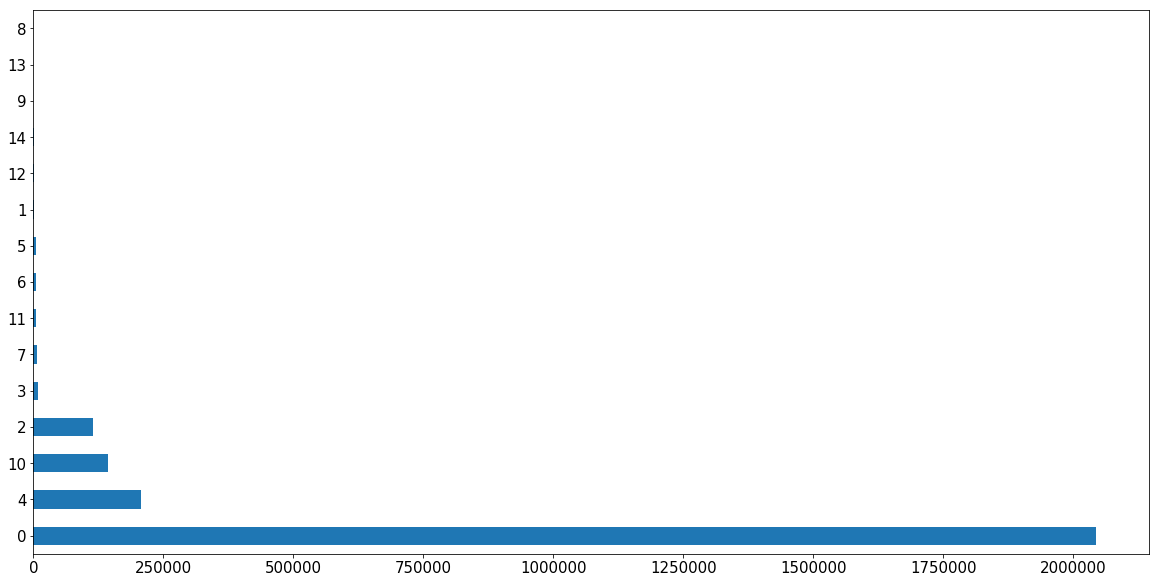

In [20]:
pd.value_counts(test_Y).plot(kind='barh', figsize=(20,10), fontsize=15)